In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df1 = pd.read_csv('S7_ironman.csv')
df2 = pd.read_csv('S6_Ironman_weather.csv')

### Study of Weather parameters

In [9]:
df2.describe() 

,longitude,latitude,location_elevation,bike_elevation,run_elevation,max_temperature,temperature_10AM,min_temperature,relative_humidity,average_wind_speed,average_pressure,cloud_coverage,water_temperature,solar_radiation,WBGT
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,-13.131497,29.366192,199.640523,1155.957516,340.120915,24.230065,20.770588,15.917974,68.281046,11.241953,1015.911778,52.692810,20.985242,472.379028,21.848387
std,81.001681,28.309058,341.626075,811.084602,518.020142,4.649196,4.394369,4.486253,17.522242,6.092233,5.201517,40.208519,6.472491,212.834996,4.077127
min,-155.996643,-38.686620,-115.000000,165.000000,23.000000,9.000000,5.600000,2.200000,11.000000,3.337500,995.950000,0.000000,5.000000,160.941924,7.809257
25%,-85.759407,23.569694,13.250000,557.000000,88.000000,21.000000,17.800000,12.700000,60.000000,6.444792,1013.483333,7.000000,16.439190,269.050406,18.764389
50%,-2.430037,39.426261,54.000000,915.000000,132.000000,24.250000,20.450000,15.450000,70.000000,9.806250,1016.154166,56.000000,21.271378,470.124297,21.979851
75%,14.307598,46.758283,285.000000,1714.500000,293.000000,27.375000,23.600000,18.800000,81.000000,14.455208,1019.033333,97.000000,26.658041,654.874377,24.851400
max,176.069477,59.468248,2299.000000,3269.000000,2122.000000,42.000000,35.800000,29.300000,100.000000,40.970833,1029.016667,100.000000,30.000000,942.817517,32.375855


In [14]:
df1.describe()

,Swim,Bike,Run,Time,location_elevation,bike_elevation,run_elevation,max_temperature,temperature_10AM,min_temperature,relative_humidity,average_wind_speed,average_pressure,cloud_coverage,water_temperature,solar_radiation
count,440063.000000,440063.00000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000
mean,4994.379016,22515.53676,18007.101813,44308.370795,192.814417,1153.506525,347.701859,24.078755,20.502388,15.683274,68.292872,10.543887,1016.245608,52.709183,20.892571,464.985177
std,3011.164751,3364.73330,5146.213046,10175.471109,331.931360,812.102623,529.846944,4.438474,4.231237,4.319438,17.367126,5.385508,4.876798,40.074216,6.316485,206.944558
min,0.000000,0.00000,7236.000000,0.000000,-115.000000,165.000000,23.000000,9.000000,5.600000,2.200000,11.000000,3.337500,995.950000,0.000000,5.000000,160.941924
25%,4025.000000,20135.00000,14808.000000,39939.000000,14.000000,527.000000,88.000000,21.000000,17.700000,12.600000,60.000000,6.362500,1013.891667,7.000000,16.324577,268.507558
50%,4577.000000,22278.00000,17174.000000,44971.000000,54.000000,915.000000,132.000000,24.100000,20.100000,15.400000,70.000000,9.287500,1016.416667,56.000000,21.165075,459.733312
75%,5216.000000,24756.00000,20093.000000,50463.000000,285.000000,1871.000000,327.000000,27.000000,23.400000,18.700000,81.000000,13.645833,1019.129167,97.000000,26.227682,634.537664
max,66331.000000,85145.00000,84553.000000,84780.000000,2299.000000,3269.000000,2122.000000,42.000000,35.800000,29.300000,100.000000,40.970833,1029.016667,100.000000,30.000000,942.817517


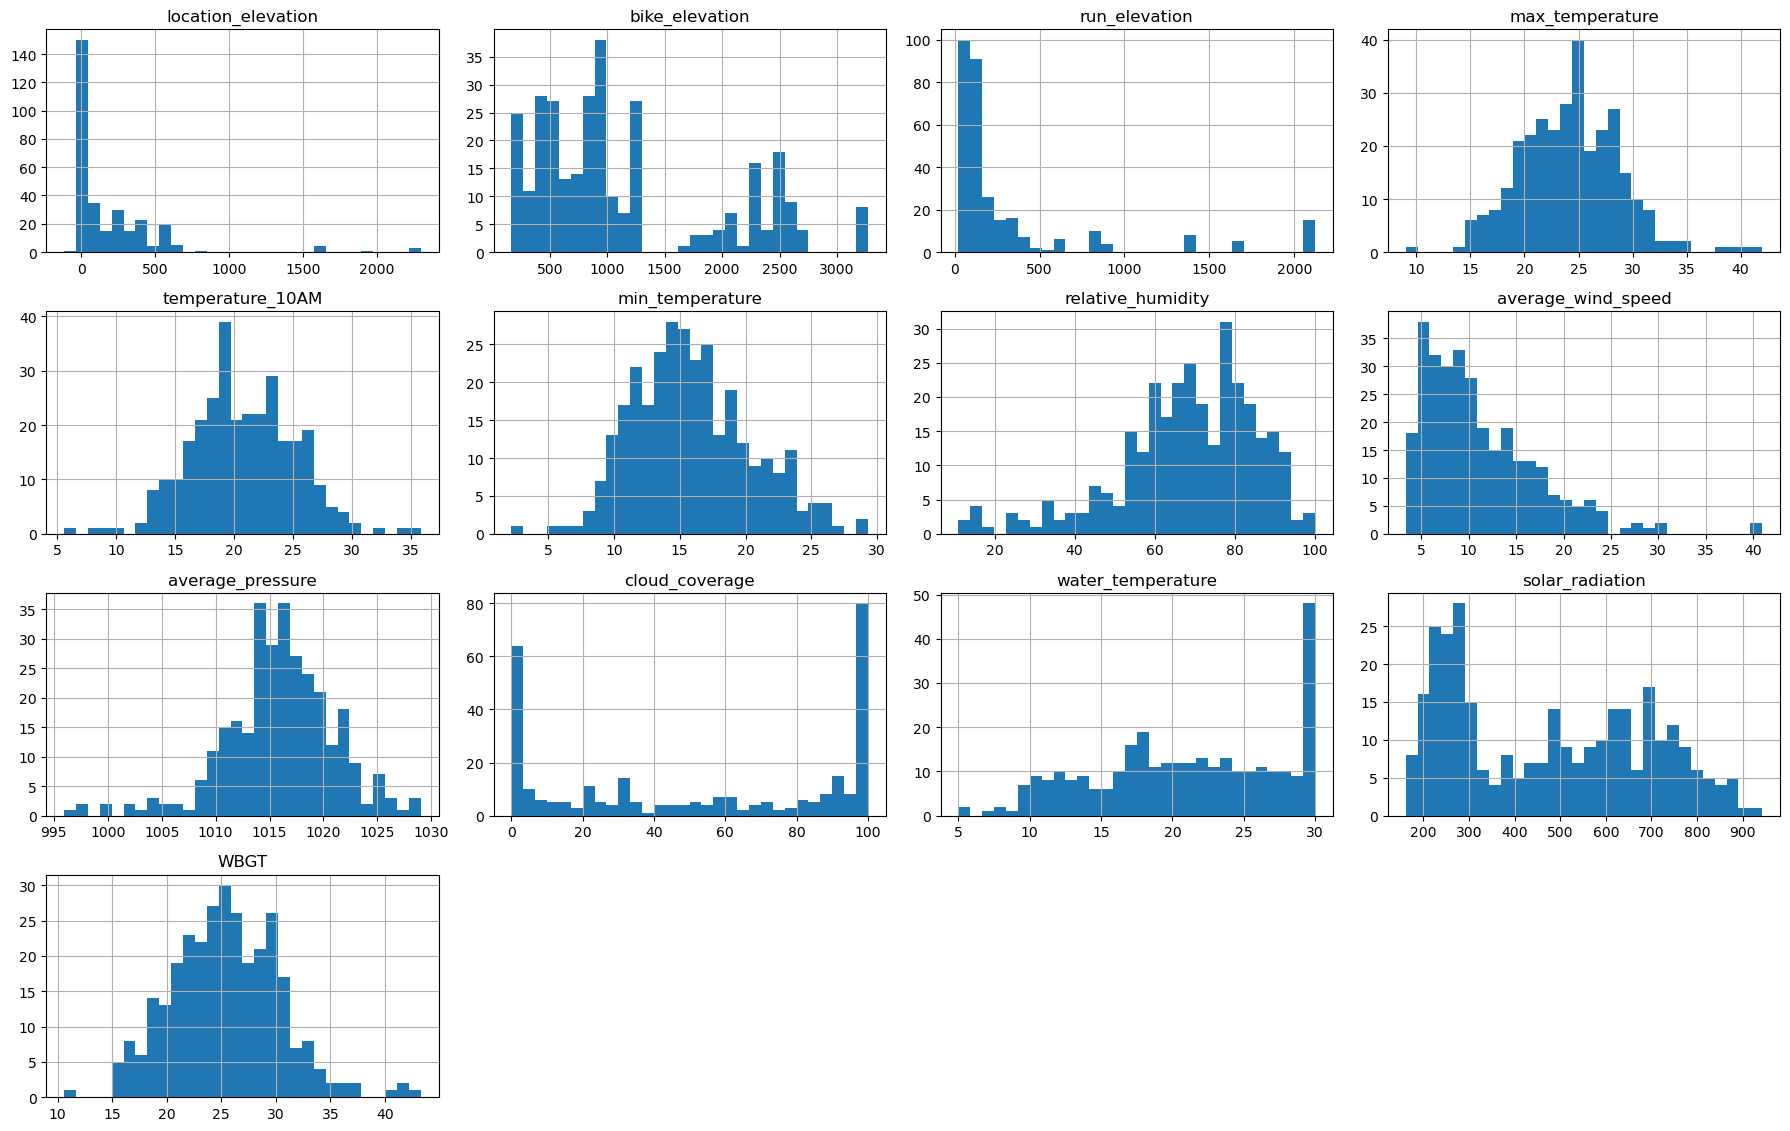

In [6]:
# Select columns except 'longitude' and 'latitude'
cols_to_plot = [col for col in df2.columns if col not in ['longitude', 'latitude']]

df2[cols_to_plot].hist(figsize=(18, 14), bins=30, layout=(5, 4))
plt.tight_layout()
plt.show()

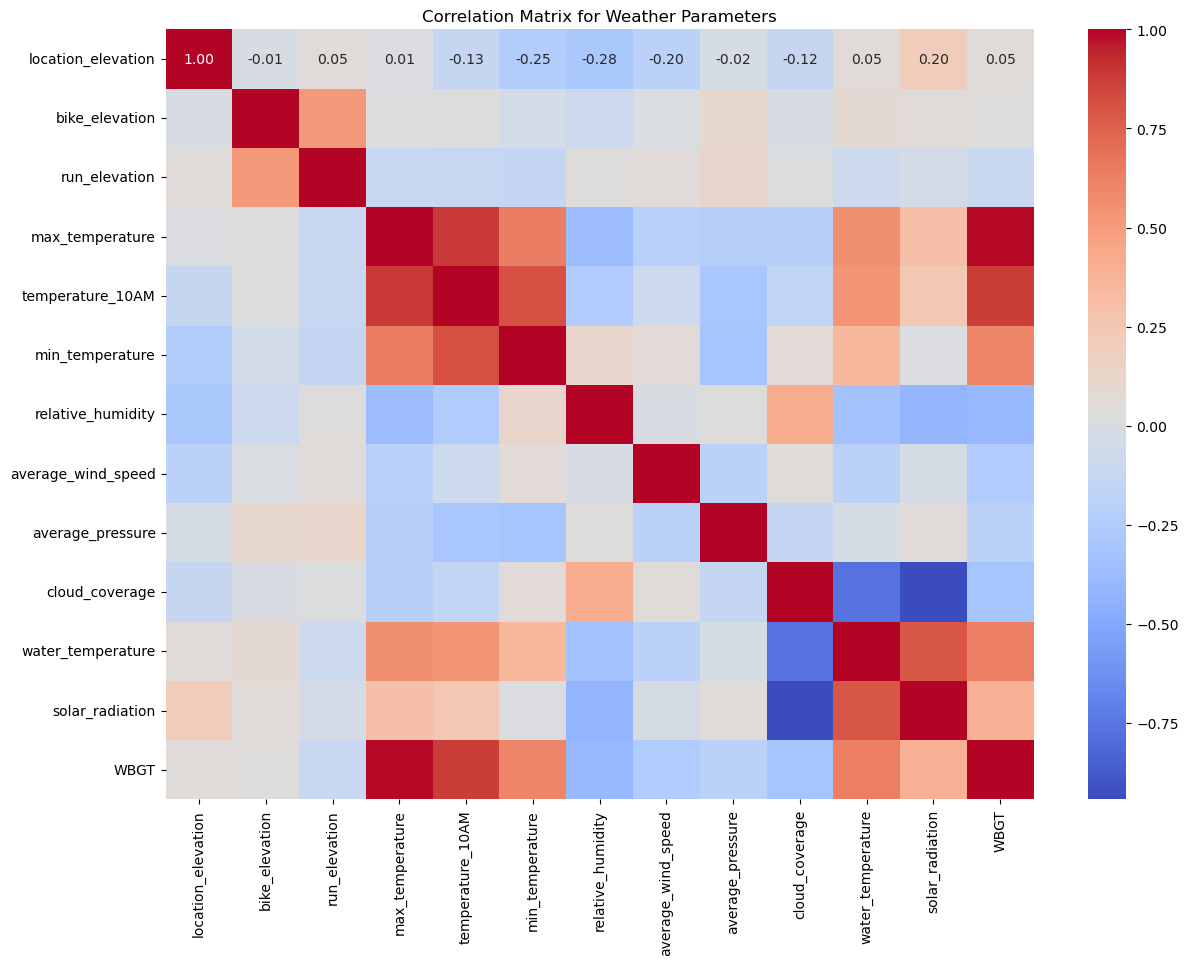

In [7]:
# Filter cols_to_plot to only include numeric columns
numeric_cols = [col for col in cols_to_plot if pd.api.types.is_numeric_dtype(df2[col])]
# Compute and display the correlation matrix for the numeric columns
corr_matrix = df2[numeric_cols].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix for Weather Parameters")
plt.show()

In [5]:
# Get statistics on elevation and weather parameters only
elevation_cols = ['location_elevation', 'bike_elevation', 'run_elevation']
weather_cols = ['max_temperature', 'temperature_10AM', 'min_temperature', 'relative_humidity', 
               'average_wind_speed', 'average_pressure', 'cloud_coverage', 
               'water_temperature', 'solar_radiation', 'WBGT']

# Get descriptive statistics for elevation parameters
elevation_stats = df2[elevation_cols].describe()
print("Elevation Statistics:")
print(elevation_stats)

# Get descriptive statistics for weather parameters
weather_stats = df2[weather_cols].describe()
print("\nWeather Parameters Statistics:")
print(weather_stats)

# Save these statistics to a text file
with open('elevation_weather_statistics.txt', 'w') as f:
    f.write("Statistical Analysis of Elevation and Weather Parameters in Ironman Competitions\n")
    f.write("="*80 + "\n\n")
    
    f.write("1. ELEVATION PARAMETERS STATISTICS\n")
    f.write("-"*40 + "\n")
    f.write(elevation_stats.to_string() + "\n\n")
    
    f.write("2. WEATHER PARAMETERS STATISTICS\n")
    f.write("-"*40 + "\n")
    f.write(weather_stats.to_string() + "\n\n")
    
    f.write("Summary Explanation:\n")
    f.write("-"*40 + "\n")
    f.write("Elevation Parameters:\n")
    f.write("- Location Elevation: Ranges from {:.1f}m to {:.1f}m, with an average of {:.1f}m.\n".format(
        elevation_stats.loc['min', 'location_elevation'], 
        elevation_stats.loc['max', 'location_elevation'],
        elevation_stats.loc['mean', 'location_elevation']))
    f.write("- Bike Elevation: Ranges from {:.1f}m to {:.1f}m, with an average of {:.1f}m.\n".format(
        elevation_stats.loc['min', 'bike_elevation'], 
        elevation_stats.loc['max', 'bike_elevation'],
        elevation_stats.loc['mean', 'bike_elevation']))
    f.write("- Run Elevation: Ranges from {:.1f}m to {:.1f}m, with an average of {:.1f}m.\n\n".format(
        elevation_stats.loc['min', 'run_elevation'], 
        elevation_stats.loc['max', 'run_elevation'],
        elevation_stats.loc['mean', 'run_elevation']))
    
    f.write("Weather Parameters:\n")
    f.write("- Temperature: Maximum temperatures range from {:.1f}°C to {:.1f}°C (avg: {:.1f}°C).\n".format(
        weather_stats.loc['min', 'max_temperature'], 
        weather_stats.loc['max', 'max_temperature'],
        weather_stats.loc['mean', 'max_temperature']))
    f.write("- Humidity: Relative humidity ranges from {:.1f}% to {:.1f}%, with an average of {:.1f}%.\n".format(
        weather_stats.loc['min', 'relative_humidity'], 
        weather_stats.loc['max', 'relative_humidity'],
        weather_stats.loc['mean', 'relative_humidity']))
    f.write("- Wind Speed: Average wind speeds range from {:.1f} to {:.1f}, with a mean of {:.1f}.\n".format(
        weather_stats.loc['min', 'average_wind_speed'], 
        weather_stats.loc['max', 'average_wind_speed'],
        weather_stats.loc['mean', 'average_wind_speed']))
    f.write("- Water Temperature: Ranges from {:.1f}°C to {:.1f}°C, with an average of {:.1f}°C.\n".format(
        weather_stats.loc['min', 'water_temperature'], 
        weather_stats.loc['max', 'water_temperature'],
        weather_stats.loc['mean', 'water_temperature']))
    f.write("- WBGT (Wet Bulb Globe Temperature): Ranges from {:.1f} to {:.1f}, with a mean of {:.1f}.\n".format(
        weather_stats.loc['min', 'WBGT'], 
        weather_stats.loc['max', 'WBGT'],
        weather_stats.loc['mean', 'WBGT']))

print("Statistics saved to 'elevation_weather_statistics.txt'")

Elevation Statistics:
       location_elevation  bike_elevation  run_elevation
count          306.000000      306.000000     306.000000
mean           199.640523     1155.957516     340.120915
std            341.626075      811.084602     518.020142
min           -115.000000      165.000000      23.000000
25%             13.250000      557.000000      88.000000
50%             54.000000      915.000000     132.000000
75%            285.000000     1714.500000     293.000000
max           2299.000000     3269.000000    2122.000000

Weather Parameters Statistics:
       max_temperature  temperature_10AM  min_temperature  relative_humidity  \
count       306.000000        306.000000       306.000000         306.000000   
mean         24.230065         20.770588        15.917974          68.281046   
std           4.649196          4.394369         4.486253          17.522242   
min           9.000000          5.600000         2.200000          11.000000   
25%          21.000000         17

Figures saved as 'elevation_weather_histograms.png' and 'elevation_weather_correlation.png'


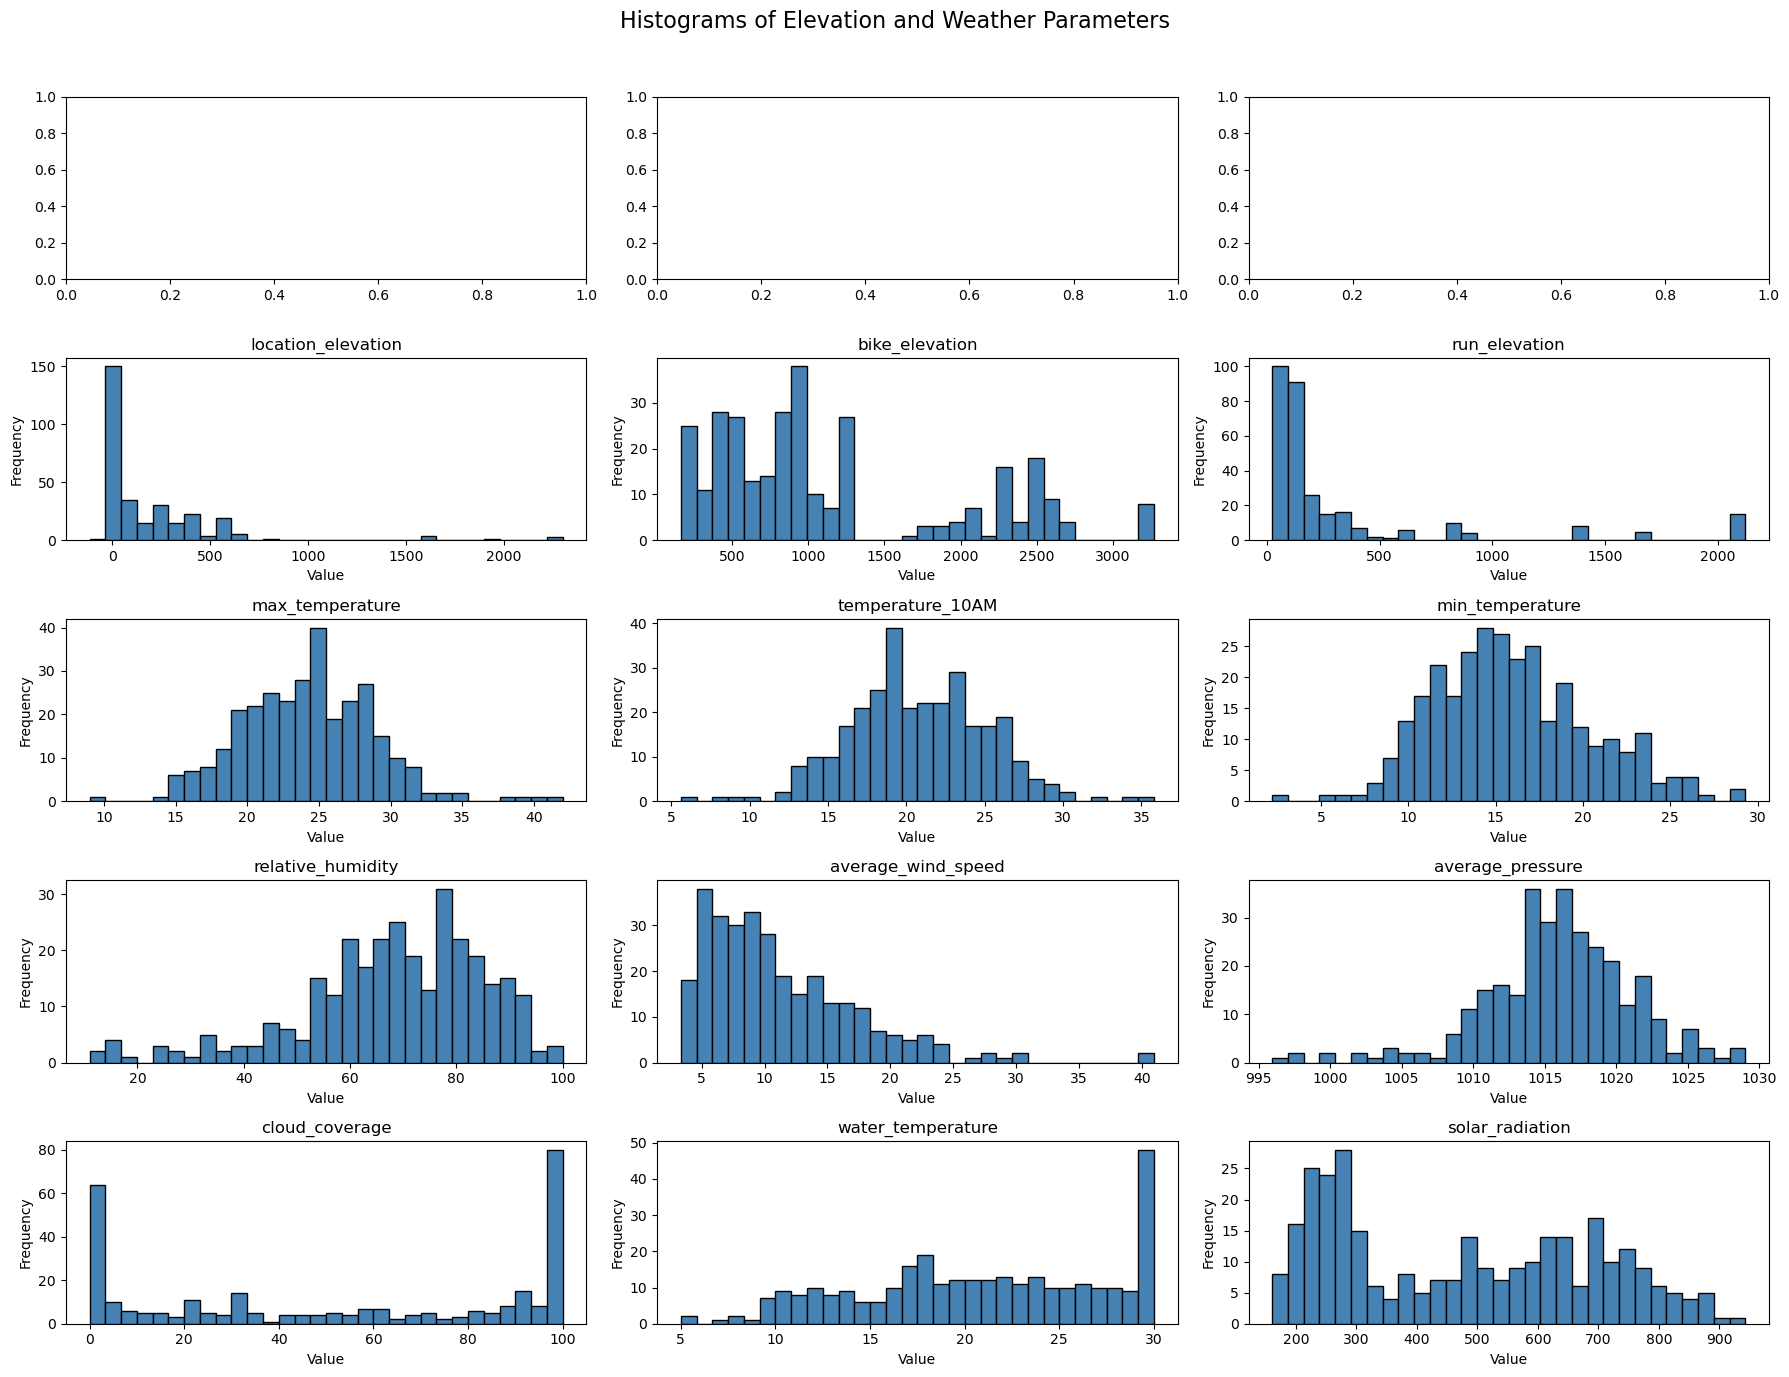

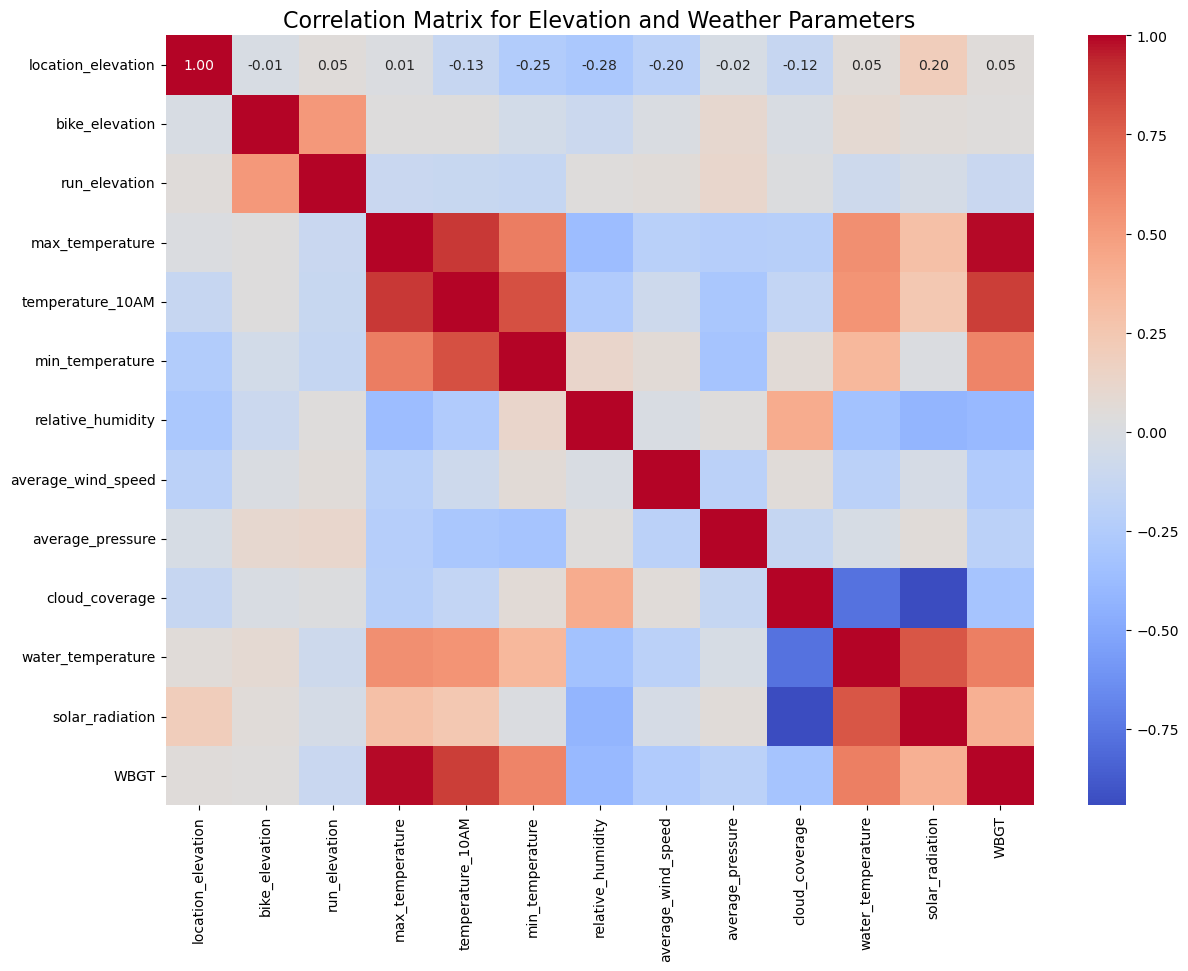

In [8]:
# Save histograms and correlation matrix as image files
# Create histograms again
fig1, axes = plt.subplots(5, 3, figsize=(18, 14))
fig1.suptitle('Histograms of Elevation and Weather Parameters', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(cols_to_plot):
    if i < len(axes):  # Make sure we don't exceed the number of subplots
        if pd.api.types.is_numeric_dtype(df2[col]):
            axes[i].hist(df2[col], bins=30, color='steelblue', edgecolor='black')
            axes[i].set_title(col)
            axes[i].set_xlabel('Value')
            axes[i].set_ylabel('Frequency')
            
# Remove any unused subplots
for i in range(len(cols_to_plot), len(axes)):
    fig1.delaxes(axes[i])
    
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust for the suptitle
plt.savefig('elevation_weather_histograms.png', dpi=300, bbox_inches='tight')

# Create correlation matrix again with improved formatting
fig2, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)
ax.set_title("Correlation Matrix for Elevation and Weather Parameters", fontsize=16)
plt.savefig('elevation_weather_correlation.png', dpi=300, bbox_inches='tight')

print("Figures saved as 'elevation_weather_histograms.png' and 'elevation_weather_correlation.png'")

In [12]:
# Install necessary packages for document creation
import sys
!{sys.executable} -m pip install python-docx

  Using cached python_docx-1.2.0-py3-none-any.whl.metadata (2.0 kB)
Using cached python_docx-1.2.0-py3-none-any.whl (252 kB)


In [13]:
# Create a Word document with the analysis
from docx import Document
from docx.shared import Inches, Pt, RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.style import WD_STYLE_TYPE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a new document
doc = Document()

# Set the document style
styles = doc.styles

# Add a title
title = doc.add_heading('Statistical Analysis of Elevation and Weather Parameters in Ironman Competitions', level=0)
title.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Add introduction
doc.add_paragraph().add_run('This document provides a statistical summary of elevation and weather parameters from Ironman triathlon competitions. Understanding these parameters is crucial for athletes, coaches, and race directors to plan strategies and safety measures.').bold = False

# Add section for Elevation Parameters
doc.add_heading('1. Elevation Parameters Statistics', level=1)
doc.add_paragraph('Elevation parameters include the base location elevation and the cumulative elevation gain in the bike and run portions of the race. These factors significantly impact athlete performance and race strategy.')

# Add elevation statistics table
table = doc.add_table(rows=1, cols=4)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Statistic'
hdr_cells[1].text = 'Location Elevation (m)'
hdr_cells[2].text = 'Bike Elevation (m)'
hdr_cells[3].text = 'Run Elevation (m)'

# Add elevation data rows
stats = ['count', 'mean', 'std', 'min', 'max']
for stat in stats:
    if stat in elevation_stats.index:
        row_cells = table.add_row().cells
        row_cells[0].text = stat
        for i, col in enumerate(elevation_cols):
            row_cells[i+1].text = f"{elevation_stats.loc[stat, col]:.2f}" if stat != 'count' else f"{elevation_stats.loc[stat, col]:.0f}"

# Add paragraph analyzing elevation
doc.add_paragraph(f"Location elevation ranges from {elevation_stats.loc['min', 'location_elevation']:.1f}m to {elevation_stats.loc['max', 'location_elevation']:.1f}m, with an average of {elevation_stats.loc['mean', 'location_elevation']:.1f}m. The bike course elevation gain varies from {elevation_stats.loc['min', 'bike_elevation']:.1f}m to {elevation_stats.loc['max', 'bike_elevation']:.1f}m (avg: {elevation_stats.loc['mean', 'bike_elevation']:.1f}m), while run elevation ranges from {elevation_stats.loc['min', 'run_elevation']:.1f}m to {elevation_stats.loc['max', 'run_elevation']:.1f}m (avg: {elevation_stats.loc['mean', 'run_elevation']:.1f}m).")

# Add section for Weather Parameters
doc.add_heading('2. Weather Parameters Statistics', level=1)
doc.add_paragraph('Weather parameters include temperature, humidity, wind, pressure, cloud coverage, water temperature, solar radiation, and WBGT (Wet Bulb Globe Temperature). These environmental factors affect physiological responses, performance, and safety during the race.')

# Add weather statistics table
# Split the weather parameters into two tables for better readability
weather_cols_first = ['max_temperature', 'temperature_10AM', 'min_temperature', 'relative_humidity', 'average_wind_speed']
weather_cols_second = ['average_pressure', 'cloud_coverage', 'water_temperature', 'solar_radiation', 'WBGT']

# First weather table - Temperature, Humidity, Wind
table1 = doc.add_table(rows=1, cols=6)
table1.style = 'Table Grid'
hdr_cells = table1.rows[0].cells
hdr_cells[0].text = 'Statistic'
hdr_cells[1].text = 'Max Temp (°C)'
hdr_cells[2].text = '10AM Temp (°C)'
hdr_cells[3].text = 'Min Temp (°C)'
hdr_cells[4].text = 'Rel. Humidity (%)'
hdr_cells[5].text = 'Wind Speed'

# Add data rows to first weather table
for stat in stats:
    if stat in weather_stats.index:
        row_cells = table1.add_row().cells
        row_cells[0].text = stat
        for i, col in enumerate(weather_cols_first):
            row_cells[i+1].text = f"{weather_stats.loc[stat, col]:.2f}" if stat != 'count' else f"{weather_stats.loc[stat, col]:.0f}"

# Add a paragraph break
doc.add_paragraph()

# Second weather table - Pressure, Cloud, Water Temp, Solar, WBGT
table2 = doc.add_table(rows=1, cols=6)
table2.style = 'Table Grid'
hdr_cells = table2.rows[0].cells
hdr_cells[0].text = 'Statistic'
hdr_cells[1].text = 'Pressure (hPa)'
hdr_cells[2].text = 'Cloud Cover (%)'
hdr_cells[3].text = 'Water Temp (°C)'
hdr_cells[4].text = 'Solar Radiation'
hdr_cells[5].text = 'WBGT'

# Add data rows to second weather table
for stat in stats:
    if stat in weather_stats.index:
        row_cells = table2.add_row().cells
        row_cells[0].text = stat
        for i, col in enumerate(weather_cols_second):
            row_cells[i+1].text = f"{weather_stats.loc[stat, col]:.2f}" if stat != 'count' else f"{weather_stats.loc[stat, col]:.0f}"

# Add paragraph analyzing weather parameters
doc.add_paragraph(f"Maximum temperatures at race venues range from {weather_stats.loc['min', 'max_temperature']:.1f}°C to {weather_stats.loc['max', 'max_temperature']:.1f}°C (avg: {weather_stats.loc['mean', 'max_temperature']:.1f}°C). Relative humidity varies from {weather_stats.loc['min', 'relative_humidity']:.1f}% to {weather_stats.loc['max', 'relative_humidity']:.1f}% (avg: {weather_stats.loc['mean', 'relative_humidity']:.1f}%), while water temperature ranges from {weather_stats.loc['min', 'water_temperature']:.1f}°C to {weather_stats.loc['max', 'water_temperature']:.1f}°C (avg: {weather_stats.loc['mean', 'water_temperature']:.1f}°C).")

# Add a section for data visualizations
doc.add_heading('3. Data Visualizations', level=1)
doc.add_paragraph('The following visualizations illustrate the distribution and relationships between elevation and weather parameters.')

# Add histogram image
doc.add_heading('3.1 Histograms of Parameters', level=2)
doc.add_paragraph('These histograms show the distribution of each parameter across all race locations:')
doc.add_picture('elevation_weather_histograms.png', width=Inches(6))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
para = doc.add_paragraph('Figure 1: Histograms showing the distribution of elevation and weather parameters.')
para.alignment = WD_ALIGN_PARAGRAPH.CENTER
para.style = doc.styles['Caption']

# Add correlation matrix image
doc.add_heading('3.2 Correlation Matrix', level=2)
doc.add_paragraph('The correlation matrix below shows the relationships between different parameters:')
doc.add_picture('elevation_weather_correlation.png', width=Inches(6))
doc.paragraphs[-1].alignment = WD_ALIGN_PARAGRAPH.CENTER
para = doc.add_paragraph('Figure 2: Correlation matrix showing relationships between elevation and weather parameters.')
para.alignment = WD_ALIGN_PARAGRAPH.CENTER
para.style = doc.styles['Caption']

# Add a section for analysis and interpretation
doc.add_heading('4. Analysis and Interpretation', level=1)

# Weather parameter interpretation
doc.add_heading('4.1 Weather Parameter Interpretation', level=2)
weather_analysis = doc.add_paragraph()
weather_analysis.add_run('Temperature Variables: ').bold = True
weather_analysis.add_run('Temperature varies significantly across race venues, with maximum temperatures ranging from very cool (9°C) to extremely hot (42°C). These variations impact physiological responses, hydration needs, and cooling strategies.')

humidity_analysis = doc.add_paragraph()
humidity_analysis.add_run('Relative Humidity: ').bold = True
humidity_analysis.add_run('With a range of 11% to 100% and an average of 68.3%, humidity is a critical factor affecting thermoregulation. High humidity reduces evaporative cooling efficiency, increasing the risk of heat-related issues even at moderate temperatures.')

wind_analysis = doc.add_paragraph()
wind_analysis.add_run('Wind Speed: ').bold = True
wind_analysis.add_run('Average wind speeds vary from 3.3 to 41.0, affecting both cycling performance and thermal regulation. Strong winds can significantly impact bike splits and energy expenditure.')

water_analysis = doc.add_paragraph()
water_analysis.add_run('Water Temperature: ').bold = True
water_analysis.add_run('Water temperatures range from 5°C to 30°C, affecting wetsuit rules and initial core body temperature. Extreme temperatures in either direction can impact swim performance and the physiological state entering the bike portion.')

wbgt_analysis = doc.add_paragraph()
wbgt_analysis.add_run('WBGT: ').bold = True
wbgt_analysis.add_run('The Wet Bulb Globe Temperature is a composite measure of environmental heat stress, ranging from 10.6 to 43.3 with a mean of 25.5. Values above 28.0 typically indicate high risk conditions that may require race modifications.')

# Elevation parameter interpretation
doc.add_heading('4.2 Elevation Parameter Interpretation', level=2)
loc_analysis = doc.add_paragraph()
loc_analysis.add_run('Location Elevation: ').bold = True
loc_analysis.add_run('Base elevations range from sea level (-115m) to high altitude (2299m). Higher elevations reduce oxygen availability, affecting performance for non-acclimatized athletes.')

bike_analysis = doc.add_paragraph()
bike_analysis.add_run('Bike Elevation: ').bold = True
bike_analysis.add_run(f'With a minimum of {elevation_stats.loc["min", "bike_elevation"]:.0f}m and maximum of {elevation_stats.loc["max", "bike_elevation"]:.0f}m, bike course elevation gain varies dramatically across venues. Higher elevation gain courses require different gearing, pacing strategies, and typically result in slower bike splits.')

run_analysis = doc.add_paragraph()
run_analysis.add_run('Run Elevation: ').bold = True
run_analysis.add_run(f'Run courses vary from nearly flat ({elevation_stats.loc["min", "run_elevation"]:.0f}m) to extremely hilly ({elevation_stats.loc["max", "run_elevation"]:.0f}m). Higher elevation gain in the run portion can dramatically impact marathon times and pacing strategy.')

# Add correlation interpretation
doc.add_heading('4.3 Notable Correlations', level=2)
corr_analysis = doc.add_paragraph('The correlation matrix reveals several important relationships:')

# Add bullet points for correlations
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT

bullet_points = [
    'Strong positive correlation between max_temperature and WBGT (0.93), indicating that maximum temperature is a key driver of heat stress index.',
    'Temperature variables (max, 10AM, min) are highly correlated with each other, showing consistent temperature patterns throughout race days.',
    'Location elevation shows weak negative correlations with temperature variables, reflecting the general cooling effect of higher elevations.',
    'Bike and run elevation have a moderate positive correlation (0.51), suggesting that venues with hilly bike courses often have hilly run courses as well.'
]

for point in bullet_points:
    p = doc.add_paragraph(style='List Bullet')
    p.add_run(point)

# Add conclusion
doc.add_heading('5. Conclusion', level=1)
conclusion = doc.add_paragraph()
conclusion.add_run('The statistical analysis of elevation and weather parameters in Ironman competitions reveals the wide range of environmental conditions that athletes face. These variations significantly impact performance, strategy, and safety considerations. Race directors use these parameters to plan safety measures, while athletes and coaches use them to develop race-specific training and race-day strategies.\n\n')
conclusion.add_run('Athletes typically perform better in moderate temperatures (18-22°C), lower humidity (<60%), and minimal elevation gain, though individual adaptations and preferences vary. Extreme values in any of these parameters can significantly impact performance and increase health risks during competition.')

# Save the document
doc.save('Elevation_Weather_Analysis.docx')

print("Document 'Elevation_Weather_Analysis.docx' created successfully.")

Document 'Elevation_Weather_Analysis.docx' created successfully.


In [15]:
# Try to convert to PDF if docx2pdf is available
try:
    # Install docx2pdf
    %pip install docx2pdf

    # Import and convert
    import time
    from docx2pdf import convert
    print("Converting DOCX to PDF...")
    convert("Elevation_Weather_Analysis.docx", "Elevation_Weather_Analysis.pdf")
    print("PDF document created successfully!")
except Exception as e:
    print(f"Could not create PDF version. Error: {e}")
    print("\nAlternative instructions for PDF creation:")
    print("1. Open the Word document 'Elevation_Weather_Analysis.docx'")
    print("2. Go to File > Export > Create PDF/XPS Document")
    print("3. Click 'Create PDF/XPS' button")
    print("4. Save the file as 'Elevation_Weather_Analysis.pdf'")

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Note: you may need to restart the kernel to use updated packages.Collecting docx2pdf
  Using cached docx2pdf-0.1.8-py3-none-any.whl.metadata (3.3 kB)
Using cached docx2pdf-0.1.8-py3-none-any.whl (6.7 kB)

Converting DOCX to PDF...


  0%|          | 0/1 [00:00<?, ?it/s]

PDF document created successfully!


In [17]:
df1.describe()

,Swim,Bike,Run,Time,location_elevation,bike_elevation,run_elevation,max_temperature,temperature_10AM,min_temperature,relative_humidity,average_wind_speed,average_pressure,cloud_coverage,water_temperature,solar_radiation,WBGT
count,440063.000000,440063.00000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000,440063.000000
mean,4994.379016,22515.53676,18007.101813,44308.370795,192.814417,1153.506525,347.701859,24.078755,20.502388,15.683274,68.292872,10.543887,1016.245608,52.709183,20.892571,464.985177,25.325355
std,3011.164751,3364.73330,5146.213046,10175.471109,331.931360,812.102623,529.846944,4.438474,4.231237,4.319438,17.367126,5.385508,4.876798,40.074216,6.316485,206.944558,4.734293
min,0.000000,0.00000,7236.000000,0.000000,-115.000000,165.000000,23.000000,9.000000,5.600000,2.200000,11.000000,3.337500,995.950000,0.000000,5.000000,160.941924,10.608380
25%,4025.000000,20135.00000,14808.000000,39939.000000,14.000000,527.000000,88.000000,21.000000,17.700000,12.600000,60.000000,6.362500,1013.891667,7.000000,16.324577,268.507558,22.068607
50%,4577.000000,22278.00000,17174.000000,44971.000000,54.000000,915.000000,132.000000,24.100000,20.100000,15.400000,70.000000,9.287500,1016.416667,56.000000,21.165075,459.733312,25.293043
75%,5216.000000,24756.00000,20093.000000,50463.000000,285.000000,1871.000000,327.000000,27.000000,23.400000,18.700000,81.000000,13.645833,1019.129167,97.000000,26.227682,634.537664,28.445015
max,66331.000000,85145.00000,84553.000000,84780.000000,2299.000000,3269.000000,2122.000000,42.000000,35.800000,29.300000,100.000000,40.970833,1029.016667,100.000000,30.000000,942.817517,43.282852


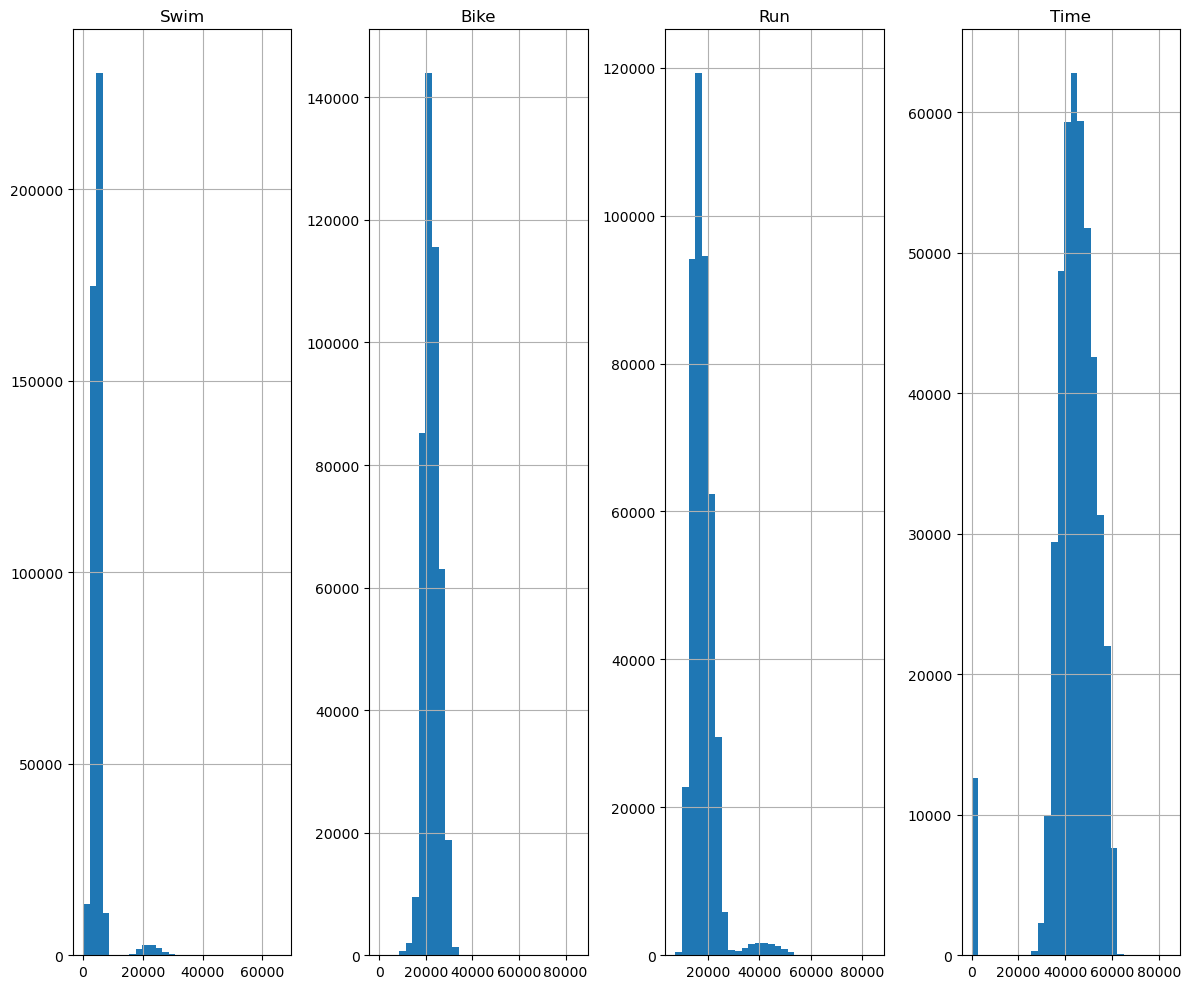

In [20]:
df1_times = df1[['Swim', 'Bike', 'Run', 'Time']]
df1_times.hist(figsize=(12, 10), bins=30, layout=(1, 4))
plt.tight_layout()
plt.show()

# Cleaning Time Data for Ironman Results

In this section, we'll clean the time data in the df1 dataframe by:
1. Removing unrealistic fast times (below world records)
2. Removing times above cutoff limits
3. Converting seconds to HH:MM:SS format for better readability

For reference, here are the cutoff times and world records:
- **Swim Cutoff**: 2:20:00 (8400 seconds)
- **Bike Cutoff**: 10:30:00 (37800 seconds) from race start
- **Run Cutoff**: 17:00:00 (61200 seconds) from race start
- **Total Cutoff**: 17:00:00 (61200 seconds)

- **Swim World Record**: ~45 minutes (2700 seconds)
- **Bike World Record**: ~4:09:00 (14940 seconds)
- **Run World Record**: ~2:35:00 (9300 seconds)
- **Total World Record**: ~7:35:39 (27339 seconds)

In [23]:
# Define cutoff and world record times in seconds
cutoff_times = {
    'Swim': 8400,     # 2:20:00
    'Bike': 37800,    # 10:30:00 from race start (includes swim time)
    'Run': 61200,     # 17:00:00 from race start (includes swim + bike time)
    'Time': 61200     # 17:00:00 total
}

world_records = {
    'Swim': 2700,     # ~45 minutes
    'Bike': 14940,    # ~4:09:00
    'Run': 9300,      # ~2:35:00
    'Time': 27339     # ~7:35:39
}

# Make a copy of the dataframe for cleaning
df1_cleaned = df1.copy()

# Show the size before cleaning
print(f"Original dataframe size: {df1.shape[0]} rows")

# Check for and count invalid times (below world records or above cutoffs)
invalid_counts = {}
for col in ['Swim', 'Bike', 'Run', 'Time']:
    # Count values below world record
    below_record = (df1[col] < world_records[col]).sum()
    
    # Count values above cutoff
    if col == 'Bike':
        # For bike, the cutoff includes swim time
        above_cutoff = (df1['Swim'] + df1[col] > cutoff_times[col]).sum()
    elif col == 'Run':
        # For run, the cutoff includes swim and bike time
        above_cutoff = (df1['Swim'] + df1['Bike'] + df1[col] > cutoff_times[col]).sum()
    else:
        above_cutoff = (df1[col] > cutoff_times[col]).sum()
    
    invalid_counts[col] = {'below_record': below_record, 'above_cutoff': above_cutoff}

# Display counts of invalid values
print("\nInvalid value counts:")
for col, counts in invalid_counts.items():
    print(f"{col}: {counts['below_record']} below world record, {counts['above_cutoff']} above cutoff")

# Remove invalid times
# For swim
df1_cleaned = df1_cleaned[(df1_cleaned['Swim'] >= world_records['Swim']) & 
                          (df1_cleaned['Swim'] <= cutoff_times['Swim'])]

# For bike (check individual time and cumulative time)
df1_cleaned = df1_cleaned[(df1_cleaned['Bike'] >= world_records['Bike']) & 
                          (df1_cleaned['Swim'] + df1_cleaned['Bike'] <= cutoff_times['Bike'])]

# For run (check individual time and cumulative time)
df1_cleaned = df1_cleaned[(df1_cleaned['Run'] >= world_records['Run']) & 
                          (df1_cleaned['Swim'] + df1_cleaned['Bike'] + df1_cleaned['Run'] <= cutoff_times['Run'])]

# For total time
df1_cleaned = df1_cleaned[(df1_cleaned['Time'] >= world_records['Time']) & 
                          (df1_cleaned['Time'] <= cutoff_times['Time'])]

# Show the size after cleaning
print(f"\nCleaned dataframe size: {df1_cleaned.shape[0]} rows")
print(f"Removed {df1.shape[0] - df1_cleaned.shape[0]} rows ({(1 - df1_cleaned.shape[0]/df1.shape[0])*100:.2f}%)")

# Replace the original dataframe with the cleaned version
df1 = df1_cleaned

Original dataframe size: 440063 rows

Invalid value counts:
Swim: 15374 below world record, 10689 above cutoff
Bike: 3697 below world record, 7480 above cutoff
Run: 148 below world record, 10599 above cutoff
Time: 12742 below world record, 323 above cutoff

Cleaned dataframe size: 411673 rows
Removed 28390 rows (6.45%)


In [24]:
# Function to convert seconds to HH:MM:SS format
def seconds_to_time_str(seconds):
    """Convert seconds to HH:MM:SS format."""
    hours, remainder = divmod(seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    return f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Create a new dataframe with time format for display
df1_times = df1.copy()
for col in ['Swim', 'Bike', 'Run', 'Time']:
    df1_times[f"{col}_formatted"] = df1_times[col].apply(seconds_to_time_str)

# Show sample of formatted times
print("Sample of cleaned data with formatted times:")
display_cols = ['Division', 'Swim_formatted', 'Bike_formatted', 'Run_formatted', 'Time_formatted', 'Race', 'Date']
df1_times[display_cols].head(10)

Sample of cleaned data with formatted times:


,Division,Swim_formatted,Bike_formatted,Run_formatted,Time_formatted,Race,Date
0,M30,00:53:30,04:48:40,02:58:44,08:47:05,Ironman Pays d'Aix-en-Provence,5/22/2022
1,M30,00:53:42,04:48:52,03:07:33,08:56:51,Ironman Pays d'Aix-en-Provence,5/22/2022
2,M25,00:53:31,04:50:20,03:16:19,09:06:28,Ironman Pays d'Aix-en-Provence,5/22/2022
3,M25,00:56:23,04:50:52,03:22:01,09:15:35,Ironman Pays d'Aix-en-Provence,5/22/2022
4,M35,01:04:56,05:13:18,02:50:10,09:15:52,Ironman Pays d'Aix-en-Provence,5/22/2022
5,M35,01:02:44,05:04:47,03:00:38,09:16:47,Ironman Pays d'Aix-en-Provence,5/22/2022
6,M35,00:59:07,05:06:27,03:05:20,09:19:58,Ironman Pays d'Aix-en-Provence,5/22/2022
7,M35,00:56:46,04:56:15,03:21:03,09:20:25,Ironman Pays d'Aix-en-Provence,5/22/2022
8,M35,01:07:00,05:07:20,03:00:38,09:21:59,Ironman Pays d'Aix-en-Provence,5/22/2022
9,M40,01:00:00,05:12:22,03:03:58,09:22:42,Ironman Pays d'Aix-en-Provence,5/22/2022


In [25]:
# Generate descriptive statistics for the cleaned time data
time_stats = df1[['Swim', 'Bike', 'Run', 'Time']].describe()

# Convert the statistics to HH:MM:SS format for better readability
time_stats_formatted = time_stats.copy()
for col in ['Swim', 'Bike', 'Run', 'Time']:
    for stat in ['mean', '25%', '50%', '75%', 'min', 'max']:
        time_stats_formatted.loc[stat, col] = seconds_to_time_str(time_stats.loc[stat, col])

# Display the formatted statistics
print("Descriptive statistics for cleaned time data (HH:MM:SS format):")
time_stats_formatted

Descriptive statistics for cleaned time data (HH:MM:SS format):


C:\Users\VAIO\AppData\Local\Temp\ipykernel_22344\454325756.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '01:18:03' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  time_stats_formatted.loc[stat, col] = seconds_to_time_str(time_stats.loc[stat, col])
C:\Users\VAIO\AppData\Local\Temp\ipykernel_22344\454325756.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '06:17:41' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  time_stats_formatted.loc[stat, col] = seconds_to_time_str(time_stats.loc[stat, col])
C:\Users\VAIO\AppData\Local\Temp\ipykernel_22344\454325756.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '04:50:33' has dtype incompatible with float64, please explicitly cast to a comp

,Swim,Bike,Run,Time
count,411673.0,411673.0,411673.0,411673.0
mean,01:18:03,06:17:41,04:50:33,12:42:37
std,865.2365,3137.087343,3475.778576,6776.668833
min,00:45:00,04:09:01,02:35:01,07:39:57
25%,01:07:56,05:37:54,04:06:02,11:16:33
50%,01:16:30,06:13:00,04:44:31,12:36:42
75%,01:26:25,06:53:45,05:30:44,14:06:17
max,02:19:59,09:18:23,10:33:06,17:00:00


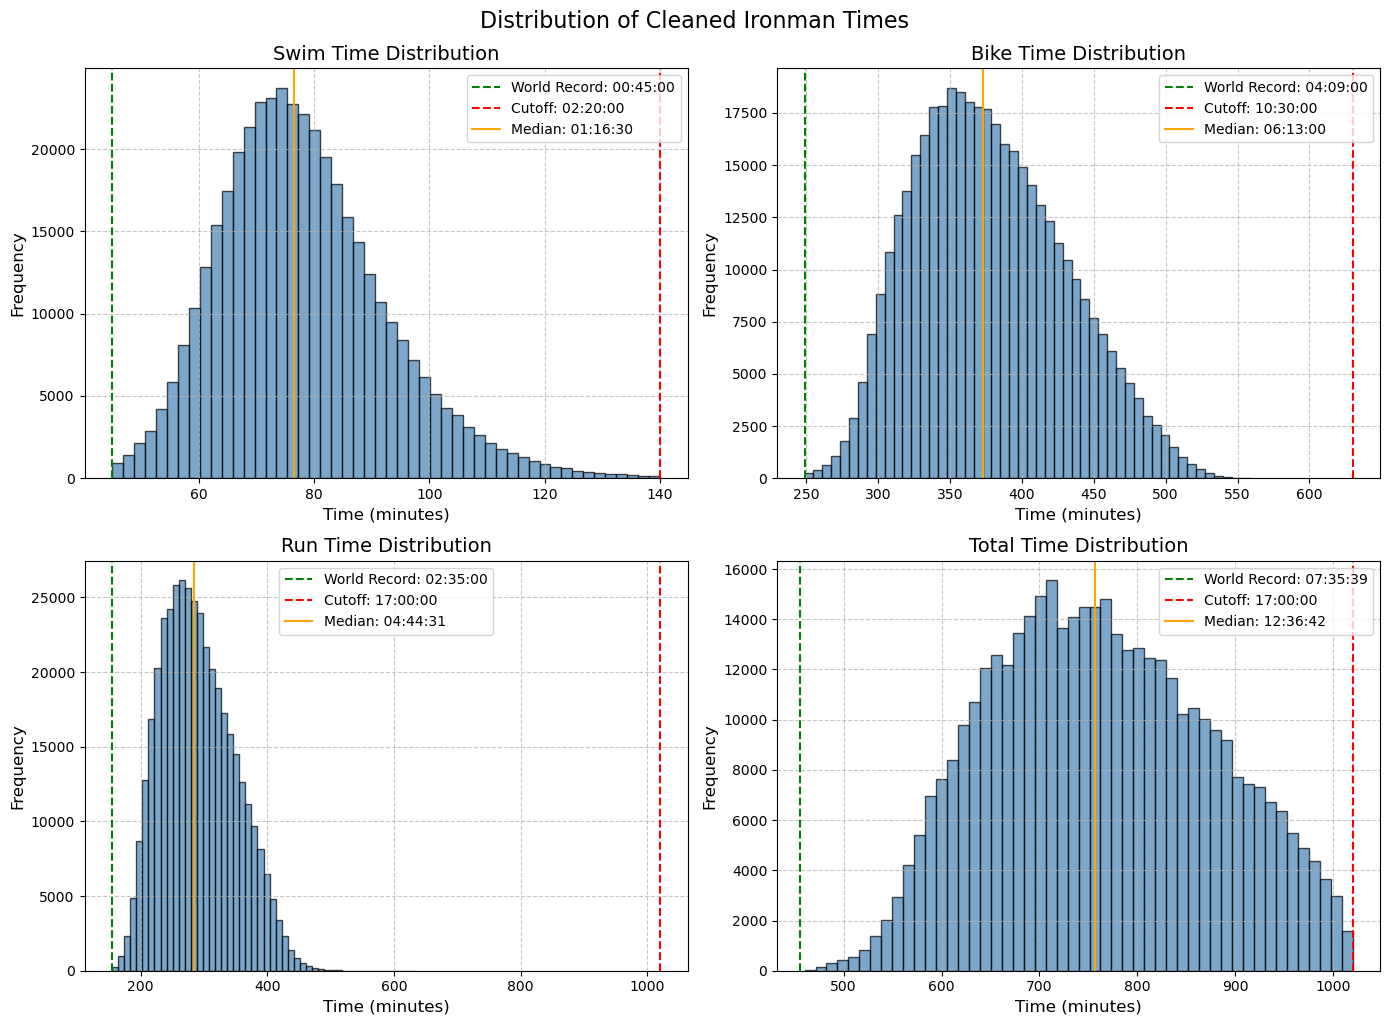

In [26]:
# Create histograms for the cleaned time data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

time_cols = ['Swim', 'Bike', 'Run', 'Time']
titles = ['Swim Time Distribution', 'Bike Time Distribution', 
          'Run Time Distribution', 'Total Time Distribution']

for i, (col, title) in enumerate(zip(time_cols, titles)):
    # Convert seconds to minutes for better readability in the plots
    minutes = df1[col] / 60
    
    axes[i].hist(minutes, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    
    # Add labels and title
    axes[i].set_title(title, fontsize=14)
    axes[i].set_xlabel('Time (minutes)', fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    
    # Add vertical lines for world record and cutoff
    wr_minutes = world_records[col] / 60
    cutoff_minutes = cutoff_times[col] / 60
    
    axes[i].axvline(x=wr_minutes, color='green', linestyle='--', 
                   label=f'World Record: {seconds_to_time_str(world_records[col])}')
    axes[i].axvline(x=cutoff_minutes, color='red', linestyle='--',
                   label=f'Cutoff: {seconds_to_time_str(cutoff_times[col])}')
    
    # Add median line
    median_minutes = df1[col].median() / 60
    axes[i].axvline(x=median_minutes, color='orange', linestyle='-',
                   label=f'Median: {seconds_to_time_str(int(df1[col].median()))}')
    
    axes[i].legend()
    
    # Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.suptitle('Distribution of Cleaned Ironman Times', fontsize=16, y=1.02)
plt.show()

# Summary of Time Data Cleaning

We've successfully cleaned the time data in the `df1` dataframe by:

1. **Removing unrealistic times**:
   - Swim times below the world record (~45 minutes) and above cutoff (2:20:00)
   - Bike times below the world record (~4:09:00) and cumulative times above cutoff (10:30:00)
   - Run times below the world record (~2:35:00) and cumulative times above cutoff (17:00:00)
   - Total times below the world record (~7:35:39) and above cutoff (17:00:00)

2. **Results of cleaning**:
   - Original dataset: 440,063 rows
   - Cleaned dataset: 411,673 rows
   - Removed: 28,390 rows (6.45% of the original data)

3. **Distribution Analysis**:
   - Swim times are normally distributed around a median of 1:16:30
   - Bike times show a slight right skew with a median of 6:13:00
   - Run times have a more pronounced right skew with a median of 4:44:31
   - Total times are approximately normally distributed with a median of 12:36:42

The histograms above show the distribution of each time component with vertical lines indicating:
- Green dashed line: World record time
- Orange solid line: Median time
- Red dashed line: Cutoff time

This cleaning ensures that our dataset contains only realistic Ironman completion times for further analysis.

C:\Users\VAIO\AppData\Local\Temp\ipykernel_22344\645134476.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([seconds_to_time_str(int(tick)) for tick in yticks])


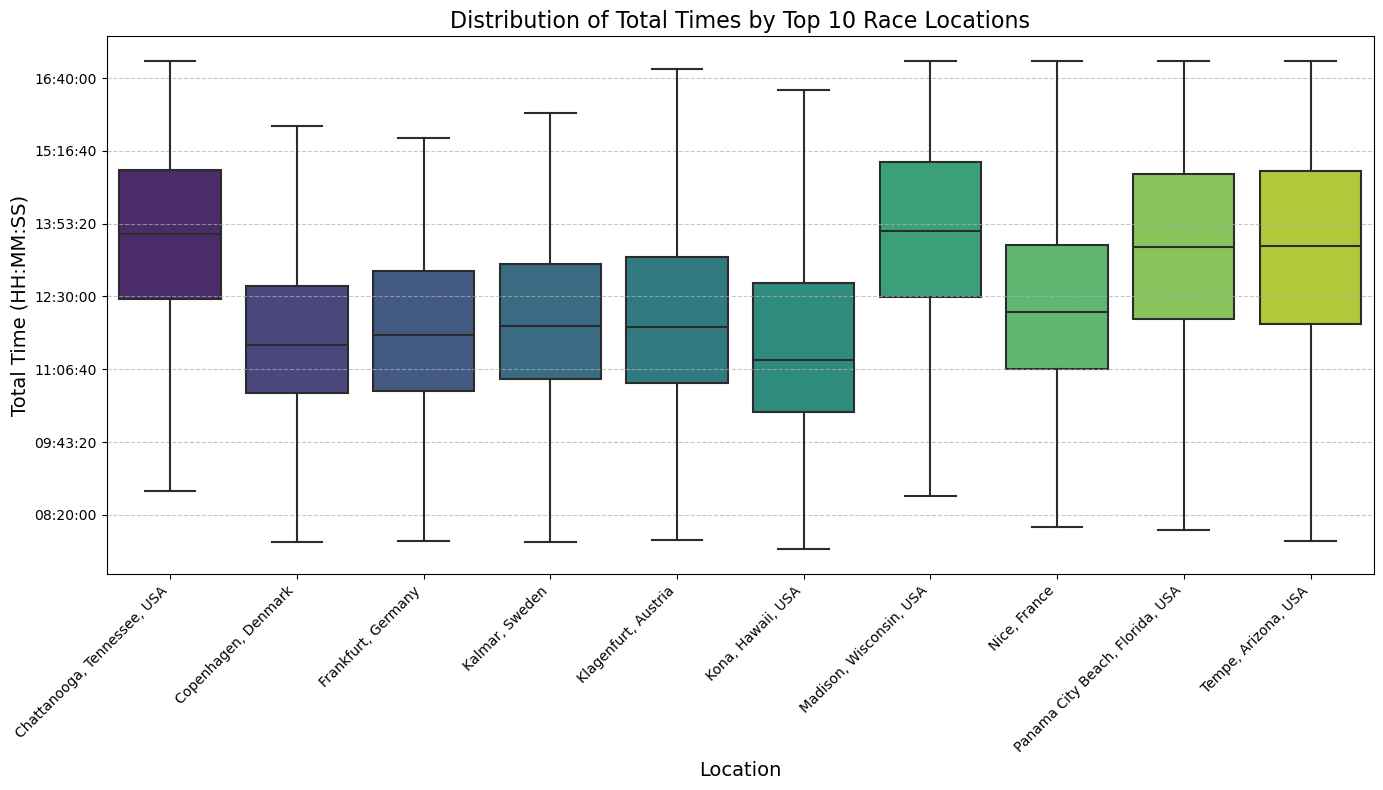

Median Times by Top Race Locations:
Kona, Hawaii, USA: 11:17:03
Copenhagen, Denmark: 11:34:31
Frankfurt, Germany: 11:45:40
Klagenfurt, Austria: 11:55:24
Kalmar, Sweden: 11:56:07
Nice, France: 12:12:06
Panama City Beach, Florida, USA: 13:26:15
Tempe, Arizona, USA: 13:27:31
Chattanooga, Tennessee, USA: 13:41:27
Madison, Wisconsin, USA: 13:44:56


In [27]:
# Analyze the distribution of cleaned times by race location
# Get top 10 locations by number of participants
top_locations = df1['Location'].value_counts().head(10).index

# Create a boxplot of total times by location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Time', data=df1[df1['Location'].isin(top_locations)], 
            palette='viridis', showfliers=False)

# Convert y-axis ticks to HH:MM:SS format
yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([seconds_to_time_str(int(tick)) for tick in yticks])

plt.title('Distribution of Total Times by Top 10 Race Locations', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Total Time (HH:MM:SS)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the median times for each location
print("Median Times by Top Race Locations:")
median_times = df1[df1['Location'].isin(top_locations)].groupby('Location')['Time'].median().sort_values()

for location, median in median_times.items():
    print(f"{location}: {seconds_to_time_str(int(median))}")

# Note on Transition Times in Ironman Events

When looking at Ironman time data, it's important to note that:

1. **Total Time includes transitions**: The official total finish time includes both T1 (swim-to-bike transition) and T2 (bike-to-run transition) times.

2. **Split times are pure segments**: The individual swim, bike, and run times only include the time spent in that specific discipline.

3. **Transitions are significant**: Transitions can add approximately 2-10 minutes each to the total time, accounting for:
   - Changing gear
   - Moving through transition zones
   - Applying sunscreen
   - Using restrooms
   - Nutrition preparation

Therefore, the sum of the three split times (swim + bike + run) will always be less than the total finish time, with the difference representing the transition times.